# At first, play a bit with MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## Check format of data

In [2]:
def print_public_fields(obj):
    for field in dir(obj):
        field_is_private = field[0] == '_' or field[1] == '_'
        if not field_is_private:
            print(field, type(getattr(obj, field)))

In [3]:
print_public_fields(mnist)

count <class 'builtin_function_or_method'>
index <class 'builtin_function_or_method'>
test <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
train <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
validation <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


In [4]:
print_public_fields(mnist.test)

epochs_completed <class 'int'>
images <class 'numpy.ndarray'>
labels <class 'numpy.ndarray'>
next_batch <class 'method'>
num_examples <class 'int'>


### Check format of images

In [11]:
from matplotlib import pyplot as plt

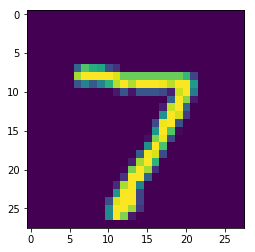

In [32]:
image = mnist.test.images[0]
image = image.reshape((28, -1))
plt.imshow(image)
plt.show()

In [31]:
print("Pixel values in range: [{}; {}]".format(image.min(), image.max()))

Pixel values in range: [0.0; 1.0]


### Train simple linear regression

In [2]:
img_len = 28*28
num_classes = 10
batch_size = 64 # Play with this parameter
test_dataset_length = len(mnist.test.labels)

In [3]:
import tensorflow as tf

In [4]:
graph = tf.Graph()

with graph.as_default():
    Xs = tf.placeholder(tf.float32, shape=[None, img_len])
    Ys = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    W = tf.Variable(tf.truncated_normal(shape=[img_len, num_classes]))
    b = tf.Variable(tf.zeros([num_classes]))
    
    logits = tf.matmul(Xs, W) + b
    loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(Ys, logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    # test
    test_predictions = tf.nn.softmax(tf.matmul(Xs, W) + b)
    correct_prediction = tf.equal(tf.argmax(Ys,1), tf.argmax(test_predictions,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
num_steps = 20000

valid_data, valid_labels = mnist.validation.next_batch(batch_size)

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for step in range(num_steps):
        train_data, train_labels = mnist.train.next_batch(batch_size)
        l, _ = session.run([loss, optimizer], feed_dict={Xs: train_data, Ys: train_labels})
        if step % 2000 == 0:
            l = session.run(loss, feed_dict={Xs: valid_data, Ys: valid_labels})
            print("[{} step] Loss for validation dataset is {}".format(step, l))
    
    test_accuracy = session.run(accuracy, feed_dict={Xs: mnist.test.images, Ys: mnist.test.labels})
    print("Test accuracy is ", test_accuracy)

[0 step] Loss for validation dataset is 12.888274192810059
[2000 step] Loss for validation dataset is 0.270382285118103
[4000 step] Loss for validation dataset is 0.2436733841896057
[6000 step] Loss for validation dataset is 0.2596595585346222
[8000 step] Loss for validation dataset is 0.29431813955307007
[10000 step] Loss for validation dataset is 0.21821440756320953
[12000 step] Loss for validation dataset is 0.2246493250131607
[14000 step] Loss for validation dataset is 0.2179436981678009
[16000 step] Loss for validation dataset is 0.25291672348976135
[18000 step] Loss for validation dataset is 0.24580085277557373
Test accuracy is  0.9189


Complete these tutorials by yourself.

* https://www.tensorflow.org/get_started/mnist/beginners
* https://www.tensorflow.org/get_started/mnist/pros

And read this article
http://colah.github.io/posts/2015-09-Visual-Information/

Also experiment with parameters and also try RNN from official Tensorflow tutorial on this link.
https://www.tensorflow.org/tutorials/

ALso if you have a time play with tutorials on the link above

# Simple convolution neural network 

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [10]:
num_classes = 10

In [20]:
graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    W_fc1 = weight_variable([7*7*64, 1024])
    b_fc1 = bias_variable([1024])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_conv, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x: batch[0], y_: batch[1], keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        
    print("test accuracy {}".format(accuracy.eval(feed_dict={
                    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})))

step 0, training accuracy 0.05999999865889549
step 100, training accuracy 0.8799999952316284
step 200, training accuracy 0.9399999976158142
step 300, training accuracy 0.8999999761581421
step 400, training accuracy 0.9599999785423279
step 500, training accuracy 0.9599999785423279
step 600, training accuracy 0.9599999785423279
step 700, training accuracy 0.9599999785423279
step 800, training accuracy 0.9200000166893005
step 900, training accuracy 0.9800000190734863
step 1000, training accuracy 0.9599999785423279
step 1100, training accuracy 1.0
step 1200, training accuracy 0.8799999952316284
step 1300, training accuracy 1.0
step 1400, training accuracy 1.0
step 1500, training accuracy 0.9599999785423279
step 1600, training accuracy 0.9599999785423279
step 1700, training accuracy 0.9800000190734863
step 1800, training accuracy 0.9599999785423279
step 1900, training accuracy 0.9800000190734863
step 2000, training accuracy 1.0
step 2100, training accuracy 0.9800000190734863
step 2200, trai

------------

# Implementing house numbers recognizer

## Step 1: Design and test a model architecture that can identify sequences of digits in an image.

### Generate empty digit in a sequence

-0.0705977004075


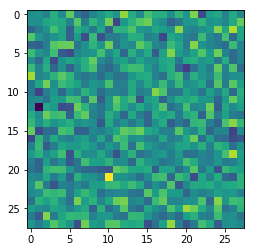

In [31]:
img = np.random.normal(size=[28, 28])
print(img.mean())
plt.imshow(img)
plt.show()

In [37]:
len(mnist.train.labels)

55000

### Working for batch generator  
Input data is 1 'long' image obtained   
from merging 5 images with digits and some empty images  

Labels are for 6 classifiers.  
Each responds for it's digit and one respond for length of sequence 

Ideas:
* To make batches uniform we will generate sequencies from 1 to 5 and repeat

Q
In SVHM dataset digits not always at the same positions
Will it be good to learn not only
```
d d d * * *
d * * * * *

but also these ?
* * d d d d
* d * d * d
```

In [4]:
# Optimize this shit someone
class BatchGenerator:
    def __init__(self, mnist, digits_limit=5):
        # self._mnist = mnist
        self._num_classes = 11 # 10 for digits and 1 for 'no digit'
        self._digits_limit = digits_limit
        
    def _noise_image(self):
        img = np.random.normal(0, 0.1, size=[28, 28])
        diff = img.max() - img.min()
        norm_img = (img - img.min()) / diff
        return norm_img
        
    def _empty_image(self):
        return np.zeros([28, 28])
    
    def _empty_label(self):
        zeros = np.zeros([11])
        zeros[-1] = 1
        return zeros
    
    # fixme: maybe too long names for variables
    def next_image(self, digits_count, aim='train'):
        '''
        Returns 
        
        First val: image with digits
        image of shape [28, 28*self.__digits_limit]
        where Each 28x28 part is a image from MNIST dataset
        or normalized to [0, 1] empty image (numpy.random.normal())
        or just zero filled matrix
        
        Second val: labels for top digits classifiers (by default there is 5 of them)
        array of shape [self.__digits_limit, 10]
        label for empty image is [0 x 10]
        
        Third value: count of empty images used here
        '''
        
        source = mnist.train
        if aim == 'validation':
            source = mnist.validation
        elif aim == 'test':
            source = mnist.test
        
        digits, digits_labels = source.next_batch(digits_count)
        digits = digits.reshape([-1, 28, 28]) # vec to image
        
        # Generate long image with digits_count in it
        image_parts = np.empty([self._digits_limit, 28, 28])
        image_parts[:digits_count] = digits
        image_parts[digits_count:self._digits_limit] = self._empty_image()
        
        image = np.hstack(image_parts)
        
        # Generate labels
        labels = np.empty([self._digits_limit, 11])
        labels[:, -1] = 0 # last digit for 'unknown' labels
        labels[:digits_count, :-1] = digits_labels
        labels[digits_count:self._digits_limit] = self._empty_label()
        
        return image, labels, digits_count
    
    # It can be done in a faster way using numpy operations
    # Rewrite it later
    def next(self, count, aim='train'):
        images = np.empty([count, 28, 28*self._digits_limit])
        labels = np.empty([count, self._digits_limit, 11])
        digits_counts = np.empty(count)
        
        # Maybe try sequencies like * * 4 3 2 or * 1 * 2 * 3 *
        # Anyway we need smaller amount of empty images
        # For example 1 per 1/10 part of batch
        # !!! May be a very good idea to shufle dataset an add blur and rotation
        # Now 20 % with 5 digits, 20 % with 4, 20% with 3, 20 % with 2, 20% with 1
        # It's for right side
        digits_count = 5+1 # 1 for first iteration 
        for i in range(count):
            if i % (count // 10) == 0:
                digits_count -= 1
            if digits_count == 0:
                digits_count = 5
            
            # digits_count = i % self._digits_limit + 1
            images[i], labels[i], digits_counts[i] = self.next_image(digits_count, aim)
        
        labels = (np.hstack(labels)).reshape([self._digits_limit, -1, 11])
        images = images.reshape([count, 28, 28*self._digits_limit, 1]) # Add one last channel dimension
        digits_counts = digits_counts.reshape([-1, 1])
        return images, labels, digits_counts

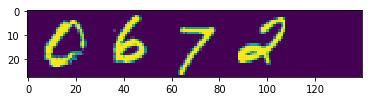

On this image is (are) 4 digit(s)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [5]:
bg = BatchGenerator(mnist, 5)
image, labels, digits_count = bg.next_image(4)
plt.imshow(image)
plt.show()
print(f'On this image is (are) {digits_count} digit(s)')
print(labels)

In [77]:
bg.next(20)

(array([[[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         ..., 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]]],
 
 
        [[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.

### Neural network

In [6]:
# Operations wrappers
def weights_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.2)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [7]:
from abc import ABC, abstractmethod

class LinearModel(ABC):
    '''As we have a graph, we dont need methods like
        def logits(self, x):
        def loss(self, x, y):
        def predictions(self, x):
        
        because we don't really passing data to these tensors
        we just passing tensors, where this data will be again and again (they still the same)
        
        instead of that we can connect tensors in right way once
        and save resulting tensors in fields
        After that we can execute them in a session easier
        '''
    
    @abstractmethod
    def __init__(self, num_features, num_classes, x, y):  
        self.num_features = num_features
        self.num_classes = num_classes
        
        self.w = weights_variable([num_features, num_classes])
        self.b = bias_variable([num_classes])
        
        self.logits = tf.matmul(x, self.w) + self.b
        self.optimizer = tf.train.AdagradOptimizer(learning_rate = 0.007)
         
class LinearClassifier(LinearModel):
    def __init__(self,  num_features, num_classes, x, y):
        LinearModel.__init__(self, num_features, num_classes, x, y)
        
        # Loss
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=y)
        self.loss = tf.reduce_mean(cross_entropy)
        
        # Probabilities and predictions
        self.probabilities = tf.nn.softmax(self.logits)
        self.predictions = tf.argmax(self.probabilities, axis=1)
        
        # Accuracy
        labels = tf.argmax(y, axis=1)
        self.accuracy = tf.reduce_mean(tf.cast(tf.equal(self.predictions, labels), tf.float32))
        
        # Training
        self.train_step = self.optimizer.minimize(self.loss)
    
class LinearRegression(LinearModel):
    def __init__(self,  num_features, num_classes, x, y):
        LinearModel.__init__(self, num_features, 1, x, y)
        
        # Loss
        mse = tf.reduce_mean(tf.squared_difference(self.logits, y))
        self.loss = mse
        
        # Predictions
        self.predictions = self.logits # to int and the calculate accuracy!
        
        # Training
        self.train_step = self.optimizer.minimize(self.loss)

In [8]:
digits_per_image = 5
num_classes = 11
num_classifiers = digits_per_image

In [9]:
graph = tf.Graph()

with graph.as_default():
    # conv > pool > conv > pool > fc1 > dropout > (5 or more linear classifiers and 1 for digits count)
    x = tf.placeholder(tf.float32, shape=[None, 28, digits_per_image*28, 1])
    ys = tf.placeholder(tf.float32, shape=[digits_per_image, None, num_classes])
    y_cnt = tf.placeholder(tf.float32, shape=[None, 1])
    
    W_conv1 = weights_variable([5, 5, 1, 32])
    b_conv1 = bias_variable(32)
    
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool2x2(h_conv1)
    
    W_conv2 = weights_variable([5, 5, 32, 64])
    b_conv2 = bias_variable(64)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool2x2(h_conv2)
    
    # A little bit hacky.
    # I should learn to calc conv shapes in mind on fly
    flat_size = int(h_pool2.shape[1] * h_pool2.shape[2] * h_pool2.shape[3])
    print(h_pool2.shape, flat_size)
    
    fc1_size = 1024
    W_fc1 = weights_variable([flat_size, fc1_size])
    b_fc1 = bias_variable([fc1_size])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, flat_size])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    dropout = tf.nn.dropout(h_fc1, keep_prob)
    
    image_embeds = dropout
    
    # Digits classifiers
    # ================================================================
    digits_classifiers = []
    for i in range(num_classifiers):
        i_th_digit_classifier = LinearClassifier(fc1_size, num_classes, image_embeds, ys[i])
        digits_classifiers.append(i_th_digit_classifier)
    
    # Digits count classifier
    count_classifier = LinearRegression(fc1_size, num_classes, image_embeds, y_cnt)
    top_classifiers = digits_classifiers + [count_classifier]
    
    # Summary loss
    summary_loss = 0
    for c in top_classifiers: # or in digits_classifiers only?
        summary_loss += c.loss
    average_loss = summary_loss / (num_classifiers + 1)
    
    summary_train_step = tf.train.AdamOptimizer(learning_rate=0.007).minimize(average_loss)

(?, 7, 35, 64) 15680


step 0
Average loss 841096.1875
0th digit classifier: [accuracy: 0.12666666507720947, loss: 177.9894561767578]
1th digit classifier: [accuracy: 0.2199999988079071, loss: 158.83883666992188]
2th digit classifier: [accuracy: 0.23999999463558197, loss: 159.4976043701172]
3th digit classifier: [accuracy: 0.03999999910593033, loss: 159.4160614013672]
4th digit classifier: [accuracy: 0.6666666865348816, loss: 62.2596549987793]
Count classifier loss: 5045859.0
step 10
step 20
step 30
step 40
step 50
step 60
step 70
step 80
step 90
step 100
step 110
step 120
step 130
step 140
step 150
step 160
step 170
step 180
step 190
step 200
step 210
step 220
step 230
step 240
step 250
step 260
step 270
step 280
step 290
step 300
step 310
step 320
step 330
step 340
step 350
step 360
step 370
step 380
step 390
step 400
step 410
step 420
step 430
step 440
step 450
step 460
step 470
step 480
step 490
step 500
Average loss 0.8389802575111389
0th digit classifier: [accuracy: 0.6200000047683716, loss: 1.29279816

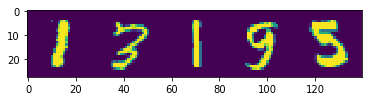

Predicted 13183 length of [ 4.79984093]


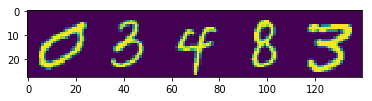

Predicted 03903 length of [ 4.74792194]


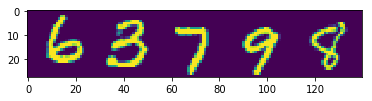

Predicted 63798 length of [ 4.88864422]


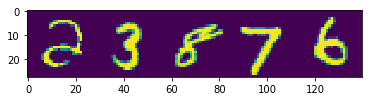

Predicted 23876 length of [ 4.80878448]


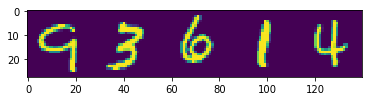

Predicted 92614 length of [ 5.06503487]


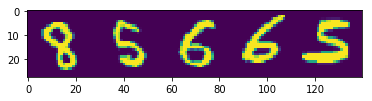

Predicted 88663 length of [ 5.42760563]


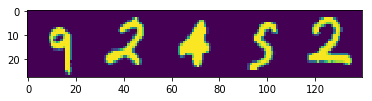

Predicted 92682 length of [ 5.04744577]


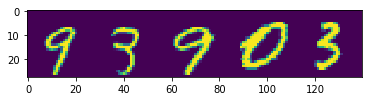

Predicted 99903 length of [ 4.59403515]


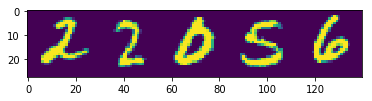

Predicted 22056 length of [ 5.60551214]


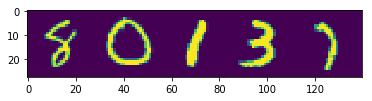

Predicted 40132 length of [ 5.47685719]


In [84]:
num_steps = 2000
bg = BatchGenerator(digits_per_image)
batch_size = 64
training_approach = "use summary loss"
validation_size = 300 # todo choose it right
test_size = 300
print_size = 10

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())
    
    # Arrays to train all in one session
    train_steps = [c.train_step for c in top_classifiers]
    losses = [c.loss for c in digits_classifiers]
    accuracies = [c.accuracy for c in digits_classifiers]
    tensors_to_run = None
    
    for i in range(num_steps):
        images, labels, empties_counts = bg.next(batch_size)
        feed_dict = {
            x: images,
            ys: labels,
            y_cnt: empties_counts,
            keep_prob: 0.5
        }
  
        # Training
        if training_approach == "use summary loss":
            session.run(summary_train_step, feed_dict=feed_dict)
        elif training_approach == "train separately":
            session.run(train_steps, feed_dict=feed_dict)

        if i % 10 == 0: 
            print(f'step {i}')

        # Validation
        if i % 1000 == 0:
            images, labels, empties_counts = bg.next(validation_size, aim='validation')
            feed_dict = {
                x: images,
                ys: labels,
                y_cnt: empties_counts,
                keep_prob: 1.0
            }

            if tensors_to_run is None:
                tensors_to_run = [losses, accuracies, count_classifier.loss, average_loss]

            cls_l, cls_a, cnt_cls_l, a_l = session.run(tensors_to_run, feed_dict=feed_dict)
            print(f"Average loss {a_l}")
            for j in range(num_classifiers):
                print(f"{j}th digit classifier: [accuracy: {cls_a[j]}, loss: {cls_l[j]}]")
            print(f"Count classifier loss: {cnt_cls_l}")
          
    # we can also continue session later
    # https://stackoverflow.com/questions/41037650/how-to-restore-session-in-tensorflow
    # https://www.tensorflow.org/versions/r0.12/api_docs/python/client/session_management   
    # test
    print(f'Test for {test_size} images')
    images, labels, digits_count = bg.next(test_size, aim='test')
    feed_dict = {
        x: images,
        ys: labels,
        y_cnt: digits_count,
        keep_prob: 1.0
    }
    
    # Accuracy
    if tensors_to_run is None:
        tensors_to_run = [losses, accuracies, count_classifier.loss, average_loss]

    cls_l, cls_a, cnt_cls_l, a_l = session.run(tensors_to_run, feed_dict=feed_dict)
    print(f"Average loss {a_l}")
    for j in range(num_classifiers):
        print(f"{j}th digit classifier: [accuracy: {cls_a[j]}, loss: {cls_l[j]}]")
    print(f"Count classifier loss: {cnt_cls_l}")

    # Actual predictions
    print("Some samples")
    predictions = [c.predictions for c in top_classifiers]
    
    c_ps = session.run(predictions, feed_dict=feed_dict)
    predicted_digits = c_ps[:digits_per_image]
    for i in range(print_size):
        plt.imshow(images[i].squeeze())
        plt.show()
        
        number = ''
        for j in range(num_classifiers):
            digit = predicted_digits[j][i]
            if digit != num_classes-1: # 'no digit' encoded as max digit
                number += str(digit)
                
        predicted_length = c_ps[-1]
        print('Predicted {} length of {}'.format(number, predicted_length[i]))
        
    # Save trained model
    saver = tf.train.Saver()
    saver.save(session, "/tmp/model.ckpt")
    
    # We can restore them later. Just read 
    # https://www.tensorflow.org/programmers_guide/saved_model

Don't know why but samples were not shown.   
But I god these results: 
```
Test for 300 images
Average loss 0.23702912032604218
0th digit classifier: [accuracy: 0.8399999737739563, loss: 0.4074385464191437]
1th digit classifier: [accuracy: 0.8700000047683716, loss: 0.3443416953086853]
2th digit classifier: [accuracy: 0.9200000166893005, loss: 0.26217225193977356]
3th digit classifier: [accuracy: 0.9333333373069763, loss: 0.1779005527496338]
4th digit classifier: [accuracy: 0.9633333086967468, loss: 0.10003896057605743]
Count classifier loss: 0.13028265535831451
```

Ans seems like it can be much better.  
It still grow even on 5000 operation.  
Maybe with other optimizer.

### Work for bugs
Can't see overfitting. All weights in range [-0.5, 0.5]  
But results become very bad after ~20-30th iteration

Any ideas?
-----
Yes!

|Solved?|Problem or suggestion|
|-|--|
|YES!| Maybe problem is in encoding of empty image  
| | Need regularization for covnet  
| | Need optimizer with Descending learning rate  
| | Bad dropout placement in network architecture  
|YES!| maybe there should not be 0 images or empty images nullifying all weights (check 1 item of this list)  
| | Maybe add layer on the top of last NN layer

!!! Execution of many operations in one session is much faster than execution of each one separately in many sessions
-------

[x] Overfitting with empty images labels encoded as zeros arrays
-------
Seems like classifiers were overfitted by the empty digits label, which was a batch of zeros.  
So it also seems like there are many empty digits in batch  
**TODO** Reduce number of empty_digits in batch  
Also last classifier getting more empty digits than first. It's not fair!

Also with every graph execution around 1Gb dissapears

[ ] Education quality related of empty images diestibution
-----
Right now it's like this
```
accuracy for 0th classifier: [0.079999998]
accuracy for 1th classifier: [0.2]
accuracy for 2th classifier: [0.40000001]
accuracy for 3th classifier: [0.60000002]
accuracy for 4th classifier: [0.80000001]
```

And it's almost fully correlated with amound empty images per digit's position in number

[ ] Train each classifier separately or all in once?
---------

If we train them separately, we can give more information about their training.  
Thanks to that I found out that classifier for last digit will get more empty images, than first.  
And so it's easy to overfit to empty images.  

But every time we train each classifier, we also train all CNN before.  
It's a very expensive.  

For example 5 minutes vs 10 seconds (when training all at once).

**But seems like training all at once using summary loss optimizes more the easiest optimizer (the last , because it has many empty images). Maybe I should use average instead of summ**

that to run first: optimizer or loss function?  
-----
I think optimizer, thel loss. In that case we will   
know loss at the end after last call of optimizer